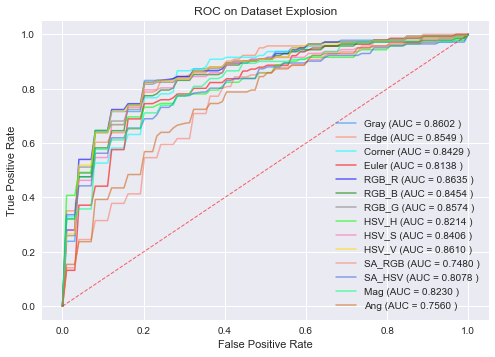

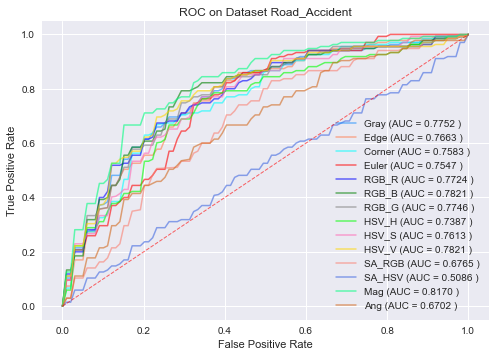

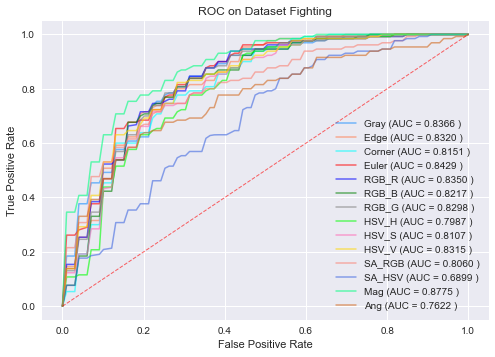

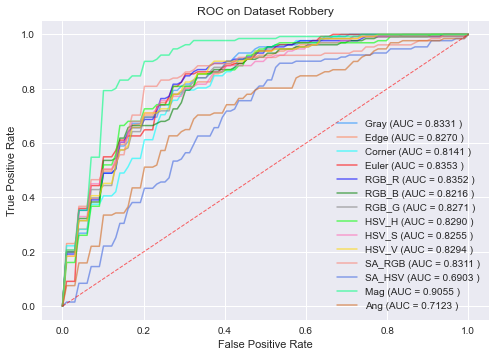

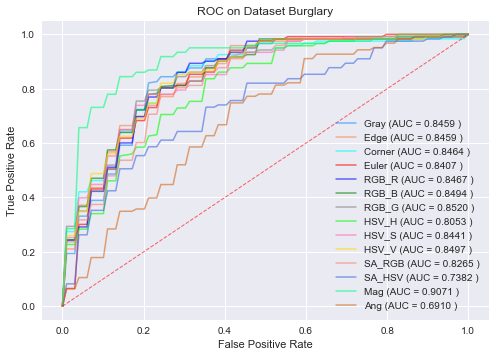

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
plt.style.use('seaborn')
import seaborn as sns
datasets=['Explosion','Road_Accident','Fighting','Robbery','Burglary']
features=['Gray','Edge','Corner','Euler','RGB_R','RGB_B','RGB_G','HSV_H','HSV_S','HSV_V','SA_RGB','SA_HSV','Mag','Ang']

colors=['dodgerblue','coral','aqua','red','blue','green','gray','lime','hotpink','gold','salmon','royalblue','springgreen','chocolate']

for data_name in datasets:
    #fig, ax = plt.subplots(figsize=(8, 6))
    fig, ax = plt.subplots()
    for feature_name,color_name in zip(features,colors):
        data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+data_name+'/'+feature_name+'.csv',index_col=0)

        y=data['Class'].values
        X=data.drop(['Class'], axis=1).values

        cv = StratifiedKFold(n_splits=5)
        parameters = {'C':list(np.arange(0,5,0.05)),'kernel':['rbf'],'probability': [True]}

        gs = GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc')
        gs.fit(X,y)
        classifier=gs.best_estimator_
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for i, (train, test) in enumerate(cv.split(X, y)):
            std =StandardScaler()
            X_train=std.fit_transform(X[train])
            X_test=std.transform(X[test])
            X_train=X[train]
            X_test=X[test]
            classifier.fit(X_train, y[train])
            test_prob = classifier.decision_function(X_test)
            Pred_prob=classifier.predict_proba(X_test)
            fpr_test,tpr_test,_ = roc_curve(y[test],Pred_prob[:,1])     
            auc_test = auc(fpr_test,tpr_test)
            interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(auc_test)
        
    
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax.plot(mean_fpr, mean_tpr, color=color_name,label= feature_name+' (AUC = %0.4f )' % (mean_auc),lw=1.5, alpha=.6)

        
        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.6)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC on Dataset '+data_name,xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.legend(loc="lower right")
    plt.show()

In [ ]:
datasets=['Road_Accident','Explosion','Burglary','Fighting','Robbery']
features=['Gray','Edge','Corner','Euler','RGB_R','RGB_B','RGB_G','HSV_H','HSV_S','HSV_V','SA_RGB','SA_HSV','OF_Mag','OF_Ang']
colors=['dodgerblue','coral','aqua','hotpink','lime','green','gray','lime','hotpink','gold','salmon','royalblue','springgreen','chocolate']

for feature_name in features:
    fig, ax = plt.subplots()
    
    for data_name,color_name in zip(datasets,colors):
        data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Intensity/CSV/'+data_name+'/'+feature_name+'.csv',index_col=0)

        y=data['Class'].values
        X=data.drop(['Class'], axis=1).values

        cv = StratifiedKFold(n_splits=5)
        parameters = {'C':list(np.arange(0,5,0.05)),'kernel':['rbf']}

        gs = GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc')
        gs.fit(X,y)
        classifier=gs.best_estimator_
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for i, (train, test) in enumerate(cv.split(X, y)):
#             std =StandardScaler()
#             X_train=std.fit_transform(X[train])
#             X_test=std.transform(X[test])
            X_train=X[train]
            X_test=X[test]
            classifier.fit(X_train, y[train])
            test_prob = classifier.decision_function(X_test)
            fpr_test,tpr_test,_ = roc_curve(y[test],test_prob)     
            auc_test = auc(fpr_test,tpr_test)  
            interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(auc_test)
        
    
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax.plot(mean_fpr, mean_tpr, color=color_name,label= data_name+' (AUC = %0.4f)' % (mean_auc),lw=2, alpha=.8)

    
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC of Feature '+feature_name,xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.legend(loc="lower right")
    plt.show()

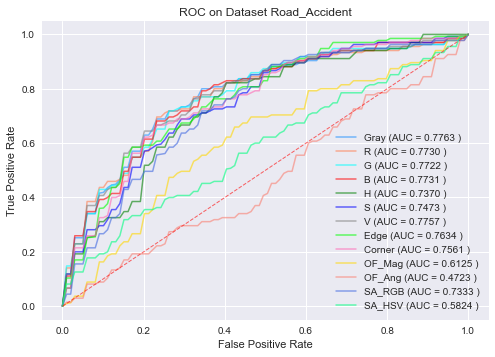

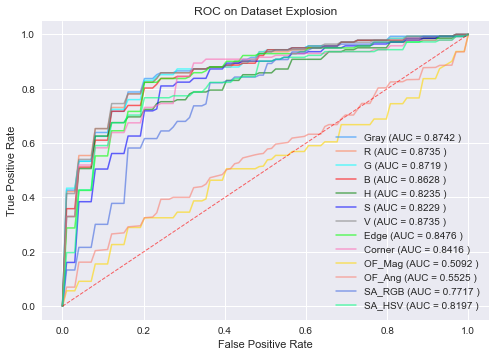

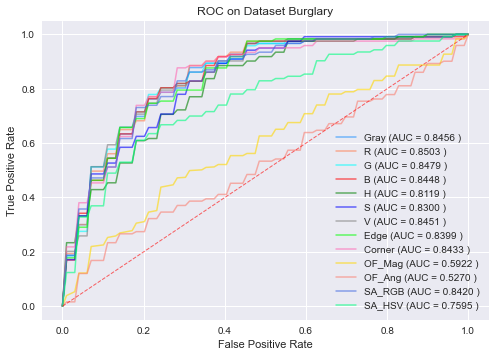

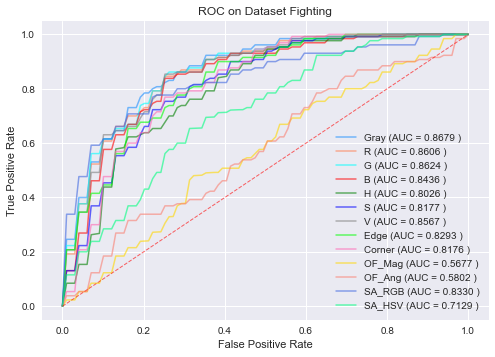

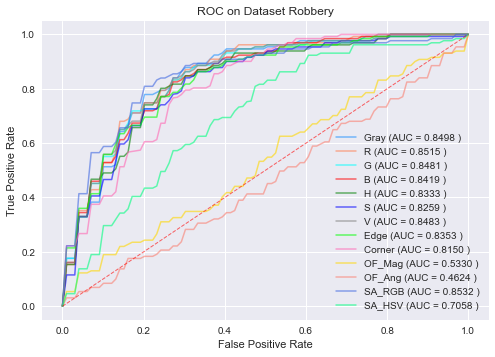

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
plt.style.use('seaborn')
import seaborn as sns
datasets=['Road_Accident','Explosion','Burglary','Fighting','Robbery']
features=['Gray','R','G','B','H','S','V','Edge','Corner','OF_Mag','OF_Ang','SA_RGB','SA_HSV']

colors=['dodgerblue','coral','aqua','red','green','blue','gray','lime','hotpink','gold','salmon','royalblue','springgreen','chocolate']

for data_name in datasets:
    #fig, ax = plt.subplots(figsize=(8, 6))
    fig, ax = plt.subplots()
    for feature_name,color_name in zip(features,colors):
        data = pd.read_csv('C:/Users/jingy/Jupyter/Crime/Combine/CDI/Entropy/CSV/'+data_name+'/'+feature_name+'.csv',index_col=0)

        y=data['Class'].values
        X=data.drop(['Class'], axis=1).values

        cv = StratifiedKFold(n_splits=5)
        parameters = {'C':list(np.arange(0,5,0.05)),'kernel':['rbf'],'probability': [True]}

        gs = GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc')
        gs.fit(X,y)
        classifier=gs.best_estimator_
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)

        for i, (train, test) in enumerate(cv.split(X, y)):
            std =StandardScaler()
            X_train=std.fit_transform(X[train])
            X_test=std.transform(X[test])
            X_train=X[train]
            X_test=X[test]
            classifier.fit(X_train, y[train])
            test_prob = classifier.decision_function(X_test)
            Pred_prob=classifier.predict_proba(X_test)
            fpr_test,tpr_test,_ = roc_curve(y[test],Pred_prob[:,1])     
            auc_test = auc(fpr_test,tpr_test)
            interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            aucs.append(auc_test)
        
    
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        ax.plot(mean_fpr, mean_tpr, color=color_name,label= feature_name+' (AUC = %0.4f )' % (mean_auc),lw=1.5, alpha=.6)

        
        
    ax.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.6)
    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title='ROC on Dataset '+data_name,xlabel='False Positive Rate',
           ylabel='True Positive Rate')
    ax.legend(loc="lower right")
    plt.show()

FileNotFoundError: [Errno 2] File C:/Users/jingy/Jupyter/Crime/Road_Accident/CDI_Based/Intensity/CSV/Gray.csv does not exist: 'C:/Users/jingy/Jupyter/Crime/Road_Accident/CDI_Based/Intensity/CSV/Gray.csv'

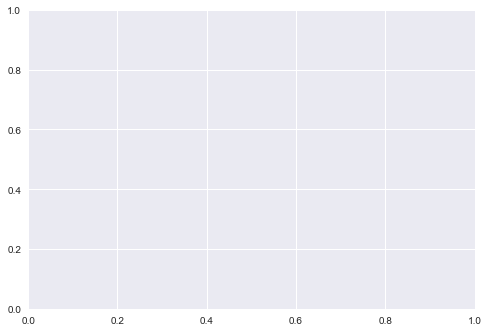

In [3]:
datasets=['Road_Accident','Explosion','Burglary','Fighting','Robbery']
features=['Gray','R','G','B','H','S','V','Edge','Corner','OF_Mag','OF_Ang','SA_RGB','SA_HSV']

colors=['dodgerblue','coral','aqua','red','green','blue','gray','lime','hotpink','gold','salmon','royalblue','springgreen','chocolate']

frame=[13,12,11,10,9,8,7,6,5,4,3,2,1,0]
x_values=list(np.arange(4,32,2))
for data_name in datasets:
    fig, ax = plt.subplots()

    for feature_name,color_name in zip(features,colors):
        d = pd.read_csv('C:/Users/jingy/Jupyter/Crime/'+data_name+'/CDI_Based/Intensity/CSV/'+feature_name+'.csv',index_col=0)
        mean_auc_list=[]
        for num in frame:
            x=d.iloc[:,num:28-num]
            data=pd.DataFrame(x)
            value=d['Class'].values
            data.loc[:,'Class']=value

            y=data['Class'].values
            X=data.drop(['Class'], axis=1).values

            cv = StratifiedKFold(n_splits=5)
            parameters = {'C':list(np.arange(0,5,0.05)),'kernel':['rbf']}

            gs = GridSearchCV(SVC(), parameters, refit = True, cv = 5, verbose = 0, n_jobs = -1,scoring='roc_auc')
            gs.fit(X,y)
            classifier=gs.best_estimator_
            tprs = []
            aucs = []
            mean_fpr = np.linspace(0, 1, 100)

            for i, (train, test) in enumerate(cv.split(X, y)):
                std =StandardScaler()
                X_train=std.fit_transform(X[train])
                X_test=std.transform(X[test])

                classifier.fit(X_train, y[train])
                test_prob = classifier.decision_function(X_test)
                fpr_test,tpr_test,_ = roc_curve(y[test],test_prob)     
                auc_test = auc(fpr_test,tpr_test)  
                interp_tpr = np.interp(mean_fpr,fpr_test, tpr_test)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                aucs.append(auc_test)


            mean_tpr = np.mean(tprs, axis=0)
            mean_tpr[-1] = 1.0
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = np.std(aucs)
            mean_auc_list.append(mean_auc)
        ax.plot(x_values,mean_auc_list,c=color_name,label= feature_name,lw=2, alpha=.8)
    ax.set(title='Auc at different frame number on '+data_name+' dataset',xlabel='Frame Number',ylabel='Auc Score')
    ax.legend(loc="lower right")
    plt.show()